In [1]:
from IPython.core.display import HTML
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import *

import os
import scipy.optimize as sco
%matplotlib inline

In [7]:
def k_and_fit(data_file,start_index=0,logging_interval=20,room_temp=21):
   
    with open(data_file) as f:
        data = np.array([float(i) for i in f.read().splitlines()[start_index:]])
    
    def exponential(t,k):
        #room temp ~ 21 C 
        return room_temp+(data[0]-room_temp)*np.exp(-k*t)
    times = np.array([float(i*logging_interval/60) for i in range(len(data))])
    
    #raw data
    plt.plot(times,data)
    
    #fit
    fit,cov = sco.curve_fit(exponential,times,data)
    plt.plot(times,exponential(times,*fit))
    print(f'k = {fit[0]}')
    
    return fit[0]

## Paper Cup (maybe ceramic could have mislabled)

k = 0.025448525422600347


0.025448525422600347

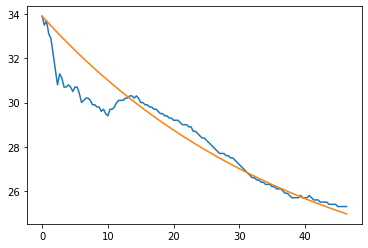

In [3]:
k_and_fit('/home/alanyu/paper_cup.txt',13)

## Stainless Steel Insulated

k = 0.00651830032556949


0.00651830032556949

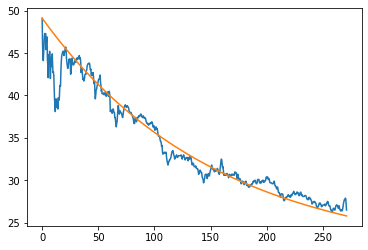

In [4]:
k_and_fit('/home/alanyu/insulated_cup.txt',0)

## Ceramic Mug

k = 0.0251386864945404


0.0251386864945404

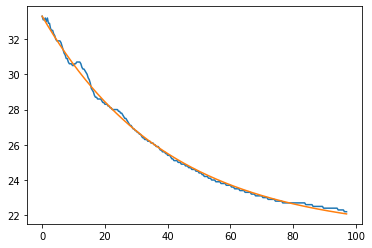

In [5]:
k_and_fit('/home/alanyu/ceramic_cup.txt',0)

## Glass Cup

k = 0.028008552697692125


0.028008552697692125

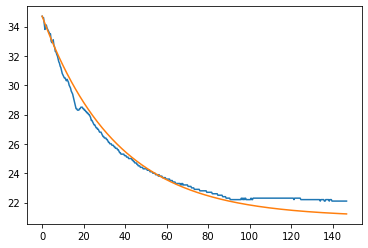

In [8]:
k_and_fit('/home/alanyu/glass_cup.txt')